<span style="font-family:Avenir;">
<font color="yellow"> <h1> Language  </font> Associations </h1> 
</span>

<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Stating Questions </h2> </font>
</span>



<span style="font-family:Avenir; font-size:1.4em;">
✦ <font color="Cyan"> What are the top three sets of programming languages used
together over time? What are some strong association rules that
can be drawn from these sets?
 </font>


</span>



<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The question is interesting and answerable.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The question is already interesting as many software developers and software companies owners need to know its answer, and it is answerable as the data is available and with some statistical techniques we can answer it.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Expectations and data match.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Exploratory Data Analytics</h2> </font>
</span>

### Imports

In [1]:
import sys
sys.path.append('../../')
from DataPreparation.Preprocess import read_data 
from DataPreparation.Visualize import convey_insights
sys.path.pop()
from Logic import *

### Reading Data

In [2]:
### EDA code goes here
data , _ = read_data(kind='all' , fix = True)

### Exploring used together Programming Language Sets

['JavaScript', ' HTML', ' CSS', ' Ruby', ' Shell']
['C', ' CoffeeScript', ' JavaScript', ' Python', ' Ruby']
['JavaScript']
['C#', ' Puppet']


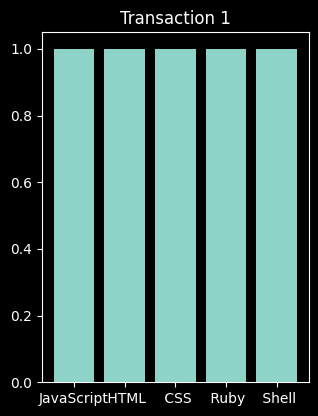

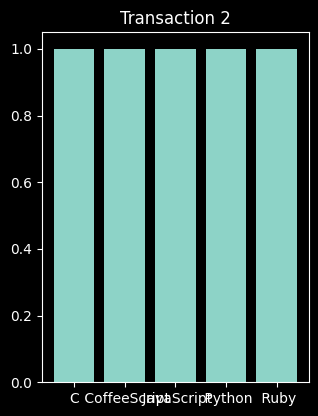

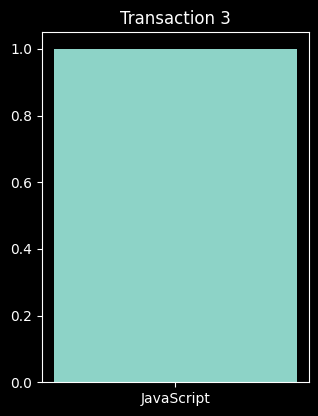

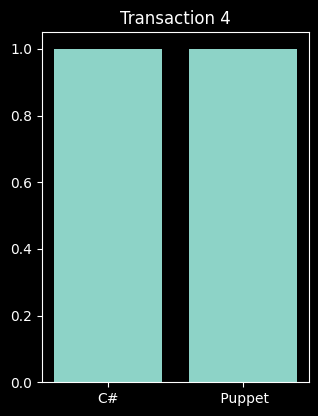

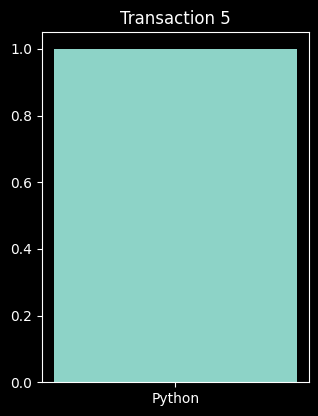

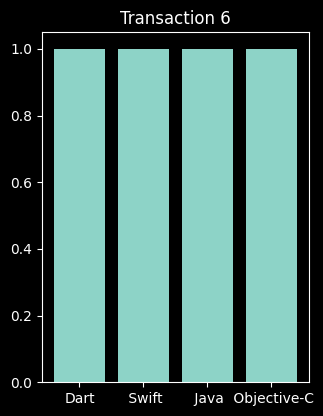

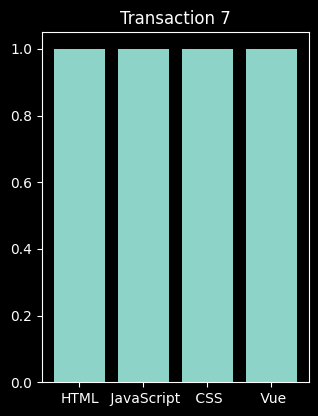

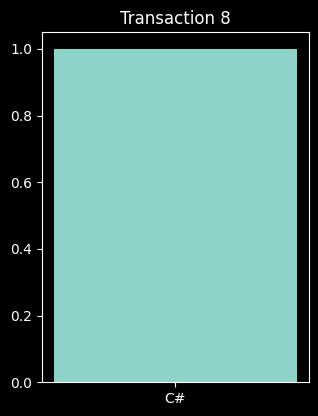

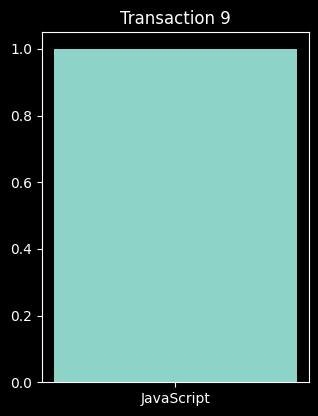

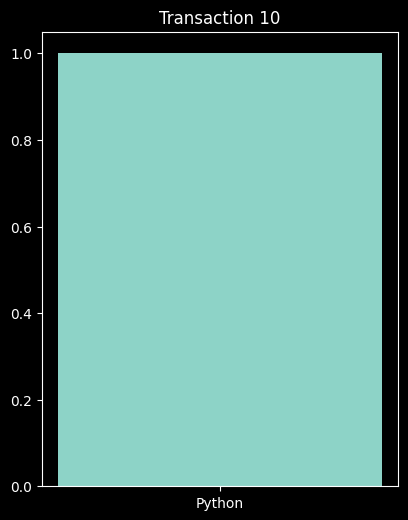

In [5]:
transactions = get_transactions(data)
print(transactions[0])
print(transactions[1])
print(transactions[2])
print(transactions[3])


#print(len([i for i in transactions if len(i) > 1]) / len(transactions) * 100)
# plot some transactions
# plt.figure(figsize=(8, 6))

# plt.subplot(221)
# plt.bar(range(len(list1)), [1]*len(list1), tick_label=list1)
# plt.title('List 1')
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(20, 10))
for i in range(10):
    # big image size
   
    plt.subplot(2, 5, i+1)
    plt.bar(range(len(transactions[i])), [1]*len(transactions[i]), tick_label=transactions[i])
    plt.title('Transaction ' + str(i+1))
plt.tight_layout()


<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      There are many programming languages sets (that have more than one programming language) used together over time
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      As seen there more than 55 % of the used programming languages sets have more than one programming language.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Expectations and data match.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Model Building</h2> </font>
</span>

### Imports

In [4]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import pandas as pd

## Answering First Part of Question

### Applying Apriori Algorithm

In [5]:
# Converting the transactions list of lists into a one-hot encoded numpy array
te = TransactionEncoder()
onehot = te.fit_transform(transactions)

In [6]:
# Converting the one-hot encoded numpy array into a pandas DataFrame
df = pd.DataFrame(onehot, columns=te.columns_)

In [7]:
# Useing apriori algorithm to find frequent itemsets
freq_items = apriori(df, min_support=0.01, use_colnames=True) 
print(freq_items)

      support                            itemsets
0    0.077185                                  ()
1    0.012457                         ( Assembly)
2    0.026395                        ( Batchfile)
3    0.055852                                ( C)
4    0.042814                              ( C++)
..        ...                                 ...
103  0.013267    ( JavaScript, TypeScript,  HTML)
104  0.010305         (JavaScript,  Shell,  HTML)
105  0.012329        ( Makefile,  Python,  Shell)
106  0.010005              ( Shell,  Makefile, C)
107  0.010929  ( JavaScript,  Shell,  CSS,  HTML)

[108 rows x 2 columns]


In [8]:
# Sorting the frequent itemsets in descending order of support and selecting the top three.
# Clearly sorting on support gets the most popular itemsets to the top of the DataFrame.
top_sets = freq_items.sort_values('support', ascending=False).head(15)

In [9]:
# Top three itemsets (That have more than one item) 
top_3_sets = top_sets[top_sets.itemsets.apply(lambda x: len(x) > 1)][0:3]
print(top_3_sets)

     support             itemsets
53  0.091709        ( CSS,  HTML)
71  0.067647  (JavaScript,  HTML)
59  0.061143   (JavaScript,  CSS)


## Answering Second Part of Question

### Imports

In [10]:
from mlxtend.frequent_patterns import association_rules

In [11]:
rules = association_rules(top_sets, metric='confidence', min_threshold=0.1 )

In [18]:
print(rules)
sorted_rules = rules.sort_values('confidence', ascending=False)

     antecedents    consequents  antecedent support  consequent support  \
0         ( CSS)        ( HTML)            0.144561            0.171556   
1        ( HTML)         ( CSS)            0.171556            0.144561   
2   (JavaScript)        ( HTML)            0.155423            0.171556   
3        ( HTML)   (JavaScript)            0.171556            0.155423   
4   (JavaScript)         ( CSS)            0.155423            0.144561   
5         ( CSS)   (JavaScript)            0.144561            0.155423   
6  ( JavaScript)         ( CSS)            0.128585            0.144561   
7         ( CSS)  ( JavaScript)            0.144561            0.128585   
8  ( JavaScript)        ( HTML)            0.128585            0.171556   
9        ( HTML)  ( JavaScript)            0.171556            0.128585   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.091709    0.634396  3.697889  0.066909    2.265960       0.852867  
1  0.091709    0.534571  3.6

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The questions can be answered using aprori algorithm.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Apriori algorithm is applied and the needed answers is obtained.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Expectations and data match.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Results & Interpretation</h2> </font>
</span>

In [17]:
#print(rules)
# print(type(rules))
# print(rules.columns)
# print(rules.iloc[0])
# print(rules.iloc[0]['antecedents'])
# print(rules.iloc[0]['consequents'])
rule = rules.iloc[0]

print(rule['antecedents'])
print(list(rule['antecedents']))
print(rule['consequents'])
print(list(rule['consequents']))

frozenset({' CSS'})
[' CSS']
frozenset({' HTML'})
[' HTML']


In [14]:
print(top_3_sets.iloc[0]['itemsets'])
#list = list(top_3_sets.iloc[0]['itemsets'])
# print(list[0])


frozenset({' CSS', ' HTML'})


In [21]:
convey_insights(
    [
        "The Top first itemset is {} with a support of {}%.".format(list(top_3_sets.iloc[0]['itemsets']), round(top_3_sets.iloc[0]['support']*100, 2)),
        "The Top second itemset is {} with a support of {}%.".format(list(top_3_sets.iloc[1]['itemsets']), round(top_3_sets.iloc[1]['support']*100, 2)),
        "The Top third itemset is {} with a support of {}%.".format(list(top_3_sets.iloc[2]['itemsets']), round(top_3_sets.iloc[2]['support']*100, 2)),
        "The Top first rule is {} -> {} with a confidence of {}%.".format(list(sorted_rules.iloc[0]['antecedents'])[0], list(sorted_rules.iloc[0]['consequents'])[0], round(sorted_rules.iloc[0]['confidence']*100, 2)),
        "The Top second rule is {} -> {} with a confidence of {}%.".format(list(sorted_rules.iloc[1]['antecedents'])[0], list(sorted_rules.iloc[1]['consequents'])[0], round(sorted_rules.iloc[1]['confidence']*100, 2)),
        "The Top third rule is {} -> {} with a confidence of {}%.".format(list(sorted_rules.iloc[2]['antecedents'])[0], list(sorted_rules.iloc[2]['consequents'])[0], round(sorted_rules.iloc[2]['confidence']*100, 2)),
        "The Top fourth rule is {} -> {} with a confidence of {}%.".format(list(sorted_rules.iloc[3]['antecedents'])[0], list(sorted_rules.iloc[3]['consequents'])[0], round(sorted_rules.iloc[3]['confidence']*100, 2)),

    ]
,"Top most frequent languages and rules")

<h3><font color="pink" size=5>Top most frequent languages and rules</font></h3> <font size=4>
<font color="pink">✦</font> The Top first itemset is [' CSS', ' HTML'] with a support of 9.17%.<br><br><font color="pink">✦</font> The Top second itemset is ['JavaScript', ' HTML'] with a support of 6.76%.<br><br><font color="pink">✦</font> The Top third itemset is ['JavaScript', ' CSS'] with a support of 6.11%.<br><br><font color="pink">✦</font> The Top first rule is  CSS ->  HTML with a confidence of 63.44%.<br><br><font color="pink">✦</font> The Top second rule is  HTML ->  CSS with a confidence of 53.46%.<br><br><font color="pink">✦</font> The Top third rule is  JavaScript ->  CSS with a confidence of 47.47%.<br><br><font color="pink">✦</font> The Top fourth rule is  JavaScript ->  HTML with a confidence of 46.07%.<br><br></font>

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Web development programming languages are the most used programming languages sets.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      HTML, CSS, and JavaScript are the most appeared in the resulted most used programming languages sets.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Expectations and data match.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Communicating Results</h2> </font>
</span>

In [22]:
convey_insights(
    [
        "As In web programming many languages are used together, the most frequent itemsets are of size are all for web programming languages.",
        "Also the top rules are between web programming languages.",
        "The Top first itemset is {} with a support of {}%.".format(list(top_3_sets.iloc[0]['itemsets']), round(top_3_sets.iloc[0]['support']*100, 2)),
        "The Top second itemset is {} with a support of {}%.".format(list(top_3_sets.iloc[1]['itemsets']), round(top_3_sets.iloc[1]['support']*100, 2)),
        "The Top third itemset is {} with a support of {}%.".format(list(top_3_sets.iloc[2]['itemsets']), round(top_3_sets.iloc[2]['support']*100, 2)),
        "The Top first rule is {} -> {} with a confidence of {}%.".format(list(sorted_rules.iloc[0]['antecedents'])[0], list(sorted_rules.iloc[0]['consequents'])[0], round(sorted_rules.iloc[0]['confidence']*100, 2)),
        "The Top second rule is {} -> {} with a confidence of {}%.".format(list(sorted_rules.iloc[1]['antecedents'])[0], list(sorted_rules.iloc[1]['consequents'])[0], round(sorted_rules.iloc[1]['confidence']*100, 2)),
        "The Top third rule is {} -> {} with a confidence of {}%.".format(list(sorted_rules.iloc[2]['antecedents'])[0], list(sorted_rules.iloc[2]['consequents'])[0], round(sorted_rules.iloc[2]['confidence']*100, 2)),
        "The Top fourth rule is {} -> {} with a confidence of {}%.".format(list(sorted_rules.iloc[3]['antecedents'])[0], list(sorted_rules.iloc[3]['consequents'])[0], round(sorted_rules.iloc[3]['confidence']*100, 2)),

    ]
,"Top most frequent languages and rules")

<h3><font color="pink" size=5>Top most frequent languages and rules</font></h3> <font size=4>
<font color="pink">✦</font> As In web programming many languages are used together, the most frequent itemsets are of size are all for web programming languages.<br><br><font color="pink">✦</font> Also the top rules are between web programming languages.<br><br><font color="pink">✦</font> The Top first itemset is [' CSS', ' HTML'] with a support of 9.17%.<br><br><font color="pink">✦</font> The Top second itemset is ['JavaScript', ' HTML'] with a support of 6.76%.<br><br><font color="pink">✦</font> The Top third itemset is ['JavaScript', ' CSS'] with a support of 6.11%.<br><br><font color="pink">✦</font> The Top first rule is  CSS ->  HTML with a confidence of 63.44%.<br><br><font color="pink">✦</font> The Top second rule is  HTML ->  CSS with a confidence of 53.46%.<br><br><font color="pink">✦</font> The Top third rule is  JavaScript ->  CSS with a confidence of 47.47%.<br><br><font color="pink">✦</font> The Top fourth rule is  JavaScript ->  HTML with a confidence of 46.07%.<br><br></font>

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The results are logical and the professor will be satisfied.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The shown results.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Will see soon.
      </td>
    </tr>
  </tbody>
</table>

</span>

